In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

In [2]:
# TASK 1 : Create Dataset

data = {
    "Study_Hours": [2, 3, 5, 6, 1, 4, 7, 8, 2, 9, 5, 6, 3, 4, 7, 8, 2, 5, 6, 9],
    "Attendance": [60, 65, 80, 85, 50, 75, 90, 95, 55, 98, 78, 88, 70, 72, 92, 96, 58, 82, 87, 99],
    "Previous_Score": [50, 55, 65, 70, 40, 60, 75, 80, 45, 85, 68, 72, 58, 62, 77, 83, 48, 66, 74, 88],
    "Final_Score": [52, 58, 70, 75, 42, 65, 80, 85, 48, 90, 72, 78, 60, 64, 82, 88, 50, 74, 79, 92]
}

df = pd.DataFrame(data)
df

,Study_Hours,Attendance,Previous_Score,Final_Score
0,2,60,50,52
1,3,65,55,58
2,5,80,65,70
3,6,85,70,75
4,1,50,40,42
5,4,75,60,65
6,7,90,75,80
7,8,95,80,85
8,2,55,45,48
9,9,98,85,90


In [3]:
# TASK 2 : Data Exploration

print("First 5 rows:")
print(df.head())

print("\nLast 5 rows:")
print(df.tail())

print("\nDataset Shape:")
print(df.shape)

print("\nData Types:")
print(df.dtypes)

print("\nMissing Values:")
print(df.isnull().sum())

First 5 rows:
   Study_Hours  Attendance  Previous_Score  Final_Score
0            2          60              50           52
1            3          65              55           58
2            5          80              65           70
3            6          85              70           75
4            1          50              40           42

Last 5 rows:
    Study_Hours  Attendance  Previous_Score  Final_Score
15            8          96              83           88
16            2          58              48           50
17            5          82              66           74
18            6          87              74           79
19            9          99              88           92

Dataset Shape:
(20, 4)

Data Types:
Study_Hours       int64
Attendance        int64
Previous_Score    int64
Final_Score       int64
dtype: object

Missing Values:
Study_Hours       0
Attendance        0
Previous_Score    0
Final_Score       0
dtype: int64


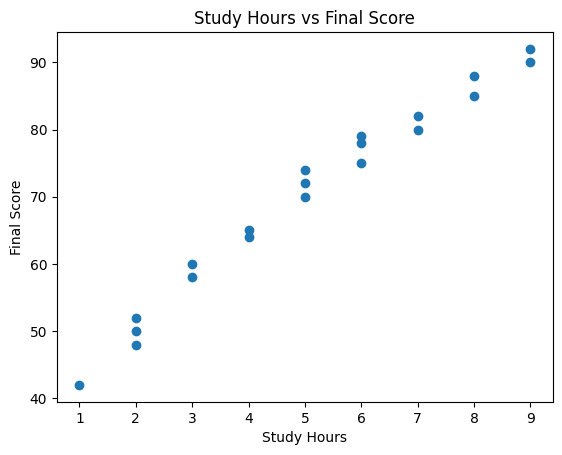

In [4]:
# TASK 3 : Data Visualization

# Scatter plot
plt.figure()
plt.scatter(df["Study_Hours"], df["Final_Score"])
plt.title("Study Hours vs Final Score")
plt.xlabel("Study Hours")
plt.ylabel("Final Score")
plt.show()

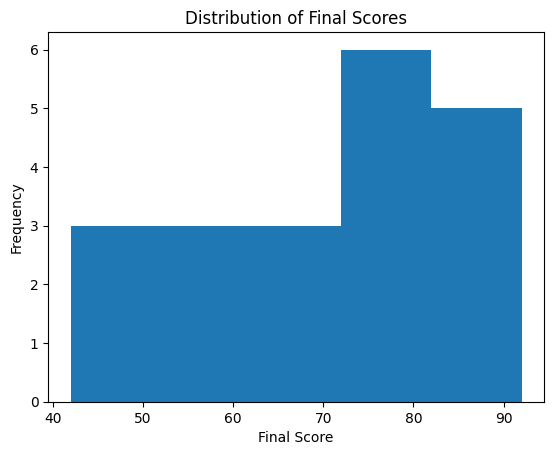

In [5]:
# Histogram
plt.figure()
plt.hist(df["Final_Score"], bins=5)
plt.title("Distribution of Final Scores")
plt.xlabel("Final Score")
plt.ylabel("Frequency")
plt.show()

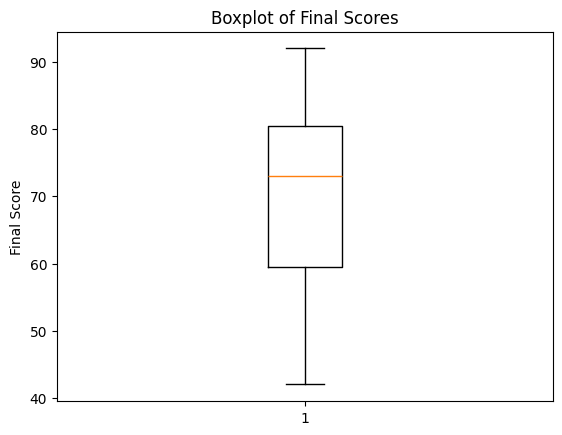

In [6]:
# box Plot
plt.figure()
plt.boxplot(df["Final_Score"])
plt.title("Boxplot of Final Scores")
plt.ylabel("Final Score")
plt.show()

In [7]:
# TASK 4 : Train And Test

X = df[["Study_Hours", "Attendance", "Previous_Score"]]
y = df["Final_Score"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("R2 Score:", r2)

#The MAE value shows the average prediction error in marks.
# The R² score indicates how well the model explains variance in final scores.
# An R² value closer to 1 means strong prediction capability.
# The model performs well because exam scores are strongly related to study hours, attendance, and previous performance.

MAE: 0.9001738836553391
R2 Score: 0.9909306392300745


In [8]:
# TASK 5 : Feature Experiment

In [9]:
# CASE 1 : Remove "Attendance"

X_reduced = df[["Study_Hours", "Previous_Score"]]

X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_reduced, y, test_size=0.3, random_state=42)

model_r = LinearRegression()
model_r.fit(X_train_r, y_train_r)

y_pred_r = model_r.predict(X_test_r)

print("Reduced MAE:", mean_absolute_error(y_test_r, y_pred_r))
print("Reduced R2:", r2_score(y_test_r, y_pred_r))


Reduced MAE: 1.1469542937432788
Reduced R2: 0.9814781477428057


In [10]:
# CASE 2 : Add "Sleep Hours"

df["Sleep_Hours"] = [6,7,6,5,8,6,5,6,7,5,6,5,7,6,5,6,8,6,5,5]

X_new = df[["Study_Hours", "Attendance", "Previous_Score", "Sleep_Hours"]]

X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(X_new, y, test_size=0.3, random_state=42)

model_n = LinearRegression()
model_n.fit(X_train_n, y_train_n)

y_pred_n = model_n.predict(X_test_n)

print("New Feature MAE:", mean_absolute_error(y_test_n, y_pred_n))
print("New Feature R2:", r2_score(y_test_n, y_pred_n))

New Feature MAE: 1.0518011965936214
New Feature R2: 0.9894017018811133


In [11]:
# TASK 6 : overfitting check (Training without Split)

model_full = LinearRegression()
model_full.fit(X, y)

y_full_pred = model_full.predict(X)

print("Full Data R2:", r2_score(y, y_full_pred))
print("Full Data MAE:", mean_absolute_error(y, y_full_pred))



Full Data R2: 0.9971466156825612
Full Data MAE: 0.5632143832266095
